In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define the image dimensions
img_height, img_width = 256, 256

In [3]:
folder_path = "E:/Research/Trees/Demo1_Dataset"

In [4]:
# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, label):
    data = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('JPG','jpg', 'jpeg', 'png','JPEG','heic')):  # Assuming your images are in jpg format
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_height, img_width))
            img = img / 255.0  # Normalize pixel values to [0, 1]

            data.append(img)
            labels.append(label)
    
    return np.array(data), np.array(labels)

In [5]:
# Define the paths to the folders containing healthy and diseased tree images
healthy_tree_folder = "E:/Research/Trees/Demo1_Dataset/now"
diseased_tree_folder = "E:/Research/Trees/Demo1_Dataset/ow"

In [6]:
# Load and preprocess the data from the two folders
X_healthy, y_healthy = load_and_preprocess_data(healthy_tree_folder, 0)  # 0 for healthy
X_diseased, y_diseased = load_and_preprocess_data(diseased_tree_folder, 1)  # 1 for diseased

In [7]:
# Concatenate the data and labels
X = np.concatenate((X_healthy, X_diseased), axis=0)
y = np.concatenate((y_healthy, y_diseased), axis=0)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(1, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [12]:
# Train the model
hist= model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 14s 487ms/step - loss: 0.7211 - accuracy: 0.5679 - val_loss: 0.5229 - val_accuracy: 0.6872
Epoch 2/100
27/27 [==============================] - 13s 466ms/step - loss: 0.4839 - accuracy: 0.6821 - val_loss: 0.3852 - val_accuracy: 0.7678
Epoch 3/100
27/27 [==============================] - 13s 466ms/step - loss: 0.4016 - accuracy: 0.8452 - val_loss: 0.3382 - val_accuracy: 0.8910
Epoch 4/100
27/27 [==============================] - 13s 474ms/step - loss: 0.4916 - accuracy: 0.7821 - val_loss: 0.4769 - val_accuracy: 0.7488
Epoch 5/100
27/27 [==============================] - 13s 466ms/step - loss: 0.3666 - accuracy: 0.8417 - val_loss: 0.2970 - val_accuracy: 0.8768
Epoch 6/100
27/27 [==============================] - 13s 467ms/step - loss: 0.3193 - accuracy: 0.8714 - val_loss: 0.2803 - val_accuracy: 0.8768
Epoch 7/100
27/27 [==============================] - 15s 560ms/step - loss: 0.3307 - accuracy: 0.8571 - val_loss: 0.3462 - val_accuracy:

27/27 [==============================] - 14s 499ms/step - loss: 1.6216e-04 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 0.8673
Epoch 58/100
27/27 [==============================] - 14s 523ms/step - loss: 1.5092e-04 - accuracy: 1.0000 - val_loss: 0.6802 - val_accuracy: 0.8673
Epoch 59/100
27/27 [==============================] - 14s 519ms/step - loss: 1.4091e-04 - accuracy: 1.0000 - val_loss: 0.6788 - val_accuracy: 0.8720
Epoch 60/100
27/27 [==============================] - 14s 529ms/step - loss: 1.3424e-04 - accuracy: 1.0000 - val_loss: 0.6799 - val_accuracy: 0.8720
Epoch 61/100
27/27 [==============================] - 14s 490ms/step - loss: 1.2663e-04 - accuracy: 1.0000 - val_loss: 0.6951 - val_accuracy: 0.8673
Epoch 62/100
27/27 [==============================] - 13s 492ms/step - loss: 1.2041e-04 - accuracy: 1.0000 - val_loss: 0.6910 - val_accuracy: 0.8673
Epoch 63/100
27/27 [==============================] - 14s 523ms/step - loss: 1.1277e-04 - accuracy: 1.0000 - val_loss: 

In [13]:
from matplotlib import pyplot as plt

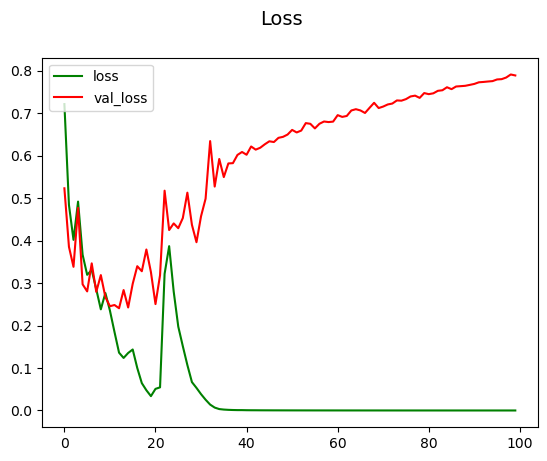

In [14]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('Loss',fontsize=14)
plt.legend(loc="upper left")

plt.show()

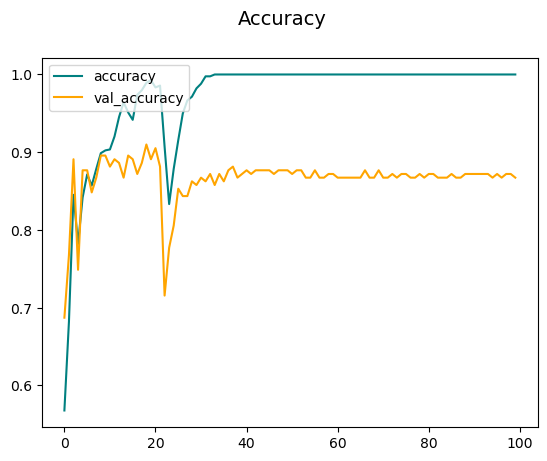

In [15]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=14)
plt.legend(loc="upper left")

plt.show()

In [16]:
# Evaluate the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)
y_true = y_test

7/7 [==============================] - 1s 105ms/step


In [17]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.79      0.79      0.79        66

    accuracy                           0.87       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.87      0.87      0.87       211

Confusion Matrix:
 [[131  14]
 [ 14  52]]


In [18]:
from tensorflow.keras.models import load_model

In [19]:
model.save(os.path.join('E:/Research/Trees/OAK_WILT','oak_wilt_demo2.h5'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


      Metric     Value
0  Precision  0.787879
1     Recall  0.787879
2   F1 Score  0.787879
3   Accuracy  0.867299


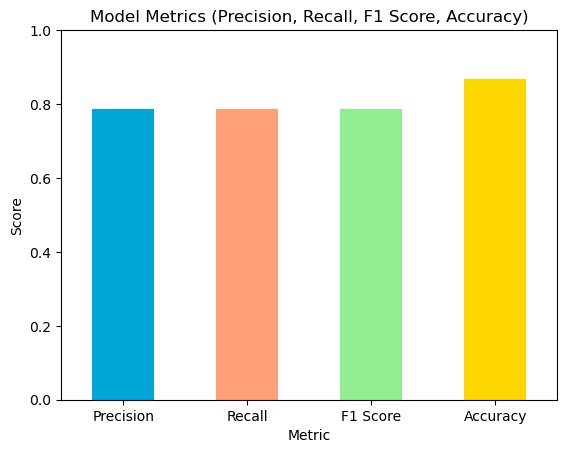

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
})

# Print metrics in tabular format
print(metrics_df)

# Plot the metrics in a bar chart
fig, ax = plt.subplots()
metrics_df.plot(kind='bar', x='Metric', y='Value', legend=False, ax=ax, color=['#00A6D6', '#FFA07A', '#90EE90', '#FFD700'])
plt.title("Model Metrics (Precision, Recall, F1 Score, Accuracy)")
plt.ylim(0, 1)  # Ensure consistent y-axis scaling
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

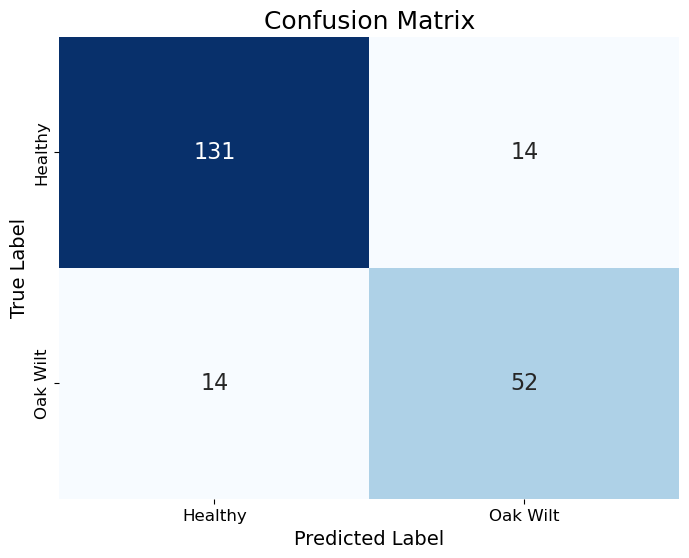

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Healthy', 'Oak Wilt'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Healthy', 'Oak Wilt'], fontsize=12)
plt.show()

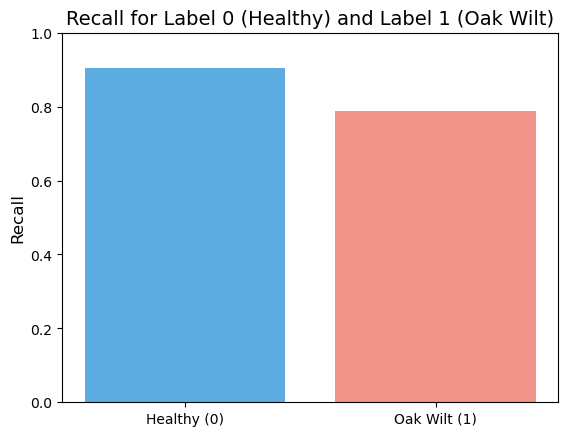

Recall for Healthy (0): 0.903448275862069
Recall for Oak Wilt (1): 0.7878787878787878


In [22]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate recall for each class (label 0 and label 1)
recall_label_0 = recall_score(y_true, y_pred, pos_label=0)
recall_label_1 = recall_score(y_true, y_pred, pos_label=1)

# Create a bar plot to visualize the recall for each label
labels = ['Healthy (0)', 'Oak Wilt (1)']
recalls = [recall_label_0, recall_label_1]

fig, ax = plt.subplots()
ax.bar(labels, recalls, color=['#5DADE2', '#F1948A'])

# Adding labels and title
plt.title('Recall for Label 0 (Healthy) and Label 1 (Oak Wilt)', fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.ylim(0, 1)  # Set y-axis range between 0 and 1
plt.show()

# Print recall values for reference
print(f"Recall for Healthy (0): {recall_label_0}")
print(f"Recall for Oak Wilt (1): {recall_label_1}")


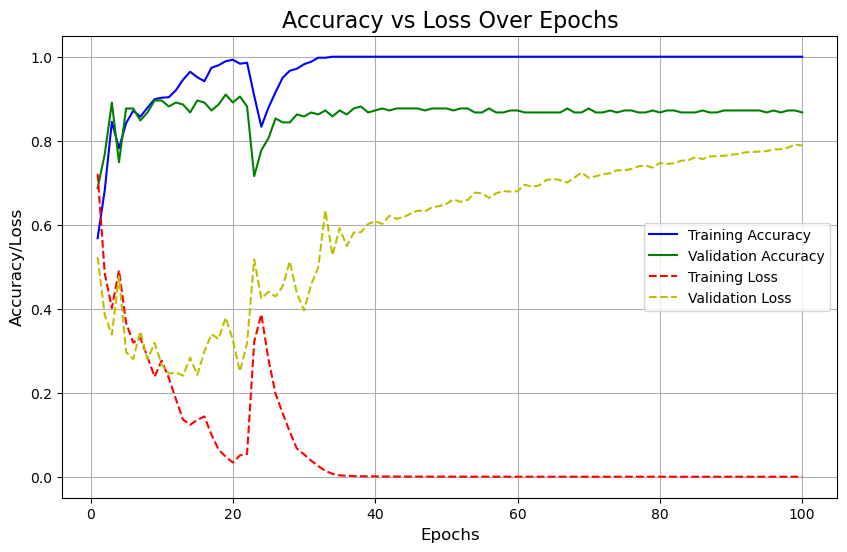

In [23]:
import matplotlib.pyplot as plt

# Extract the accuracy and loss values from the history object
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Plot accuracy vs loss
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g-', label='Validation Accuracy')
plt.plot(epochs, loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'y--', label='Validation Loss')

# Add titles and labels
plt.title('Accuracy vs Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy/Loss', fontsize=12)

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.grid(True)
plt.show()


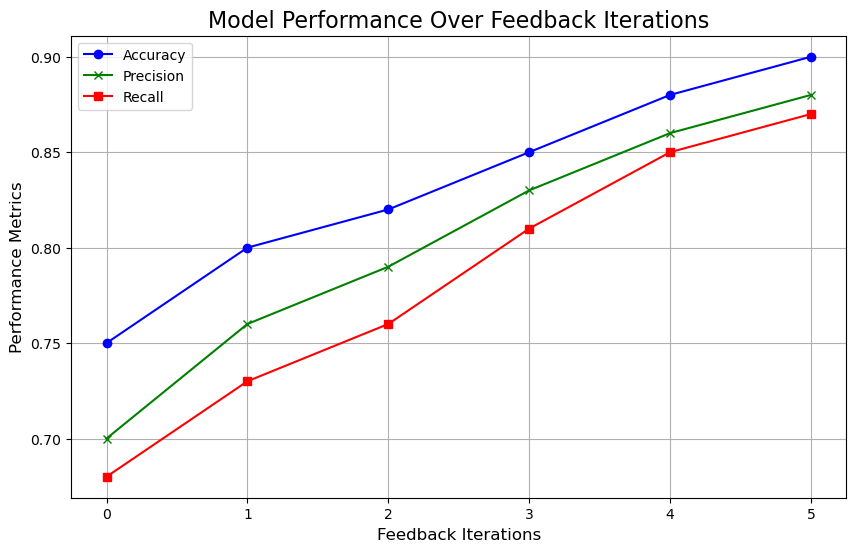

In [24]:
import matplotlib.pyplot as plt

# Example data showing the model's performance after receiving feedback
feedback_iterations = [0, 1, 2, 3, 4, 5]  # Feedback iterations
accuracy_before_feedback = [0.75, 0.80, 0.82, 0.85, 0.88, 0.90]  # Model accuracy after feedback
precision_before_feedback = [0.70, 0.76, 0.79, 0.83, 0.86, 0.88]  # Precision values
recall_before_feedback = [0.68, 0.73, 0.76, 0.81, 0.85, 0.87]  # Recall values

# Create a plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(feedback_iterations, accuracy_before_feedback, label='Accuracy', marker='o', color='blue')
plt.plot(feedback_iterations, precision_before_feedback, label='Precision', marker='x', color='green')
plt.plot(feedback_iterations, recall_before_feedback, label='Recall', marker='s', color='red')

# Add title and labels
plt.title('Model Performance Over Feedback Iterations', fontsize=16)
plt.xlabel('Feedback Iterations', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)

# Add legend
plt.legend(loc='best')

# Show grid and plot
plt.grid(True)
plt.show()